# Taller 2
En el presente jupyter notebook se va realizar el desarrollo del primer taller de la materia de maestría "Introducción en ciencia de datos" de la universidad Tecnológica de pereira.

## Cómo iniciar a usar este proyecto?
- Debe tener [python](https://www.python.org/downloads/) instalado.
- Luego ejecute la siguiente linea desde terminal (Debe estar ubicado en el directorio root de este proyecto).

    ```shell
    pip install pipenv
    ```
- Ahora escriba la siguiente línea en el terminal.

    ```shell
    pipenv install
    ```
- Ajuste su IDE para seleccionar como interprete el nuevo ambiente virtual.

Autor: Diego Alejandro Moreno Gallón<br>
Ing Eléctrico<br>
Universidad Tecnológica de Pereira

In [2]:
import numpy as np
import pandas as pd

Describan brevemente la composición de su base de datos indicando qué fenómeno está siendo descrito. Algunas preguntas gu ́ıas son: ¿Sus datos son estructurados o no estructurados? ¿En qué tipo de archivo est ́an contenidos sus datos? ¿Es necesario el empleo de un parser para extraer la información? ¿Cuál es la tipolog ́ıa de las variables (i.e., cualitativas o cuantitativas, nominales u ordinales, discretas o continuas, etc.)?

In [2]:
df_tables = []
for num in range(8, 22):
    if num < 10:
        filename = '0' + str(num) + '.csv'
    else:
        filename = str(num) + '.csv'
    path = f'./../data_raw/nofetal20{filename}'
    print(path)
    df_aux = pd.read_csv(path,
                        sep=',',
                        encoding='latin-1')
    df_tables.append(df_aux)
    del df_aux
    

./../data_raw/nofetal2008.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_7860\103653783.py:9: DtypeWarning: Columns (18,53,55,57,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2009.csv
./../data_raw/nofetal2010.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_7860\103653783.py:9: DtypeWarning: Columns (55,57,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2011.csv
./../data_raw/nofetal2012.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_7860\103653783.py:9: DtypeWarning: Columns (11,12,23,38,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2013.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_7860\103653783.py:9: DtypeWarning: Columns (11,12,23,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2014.csv
./../data_raw/nofetal2015.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_7860\103653783.py:9: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2016.csv
./../data_raw/nofetal2017.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_7860\103653783.py:9: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2018.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_7860\103653783.py:9: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2019.csv
./../data_raw/nofetal2020.csv
./../data_raw/nofetal2021.csv


In [3]:
pos = 0
for df, num in zip(df_tables, range(8, 22)):
    if num < 10:
        year_num = '0' + str(num)
    else:
        year_num = str(num)
    print(f'Year: 20{year_num} Rows: {df.shape[0]} Columns: {df.shape[1]}')
    if pos < len(df_tables)-1:
        set_aux = set(df_tables[pos].columns)
        pos += 1
        set_symmetric_difference = set_aux.symmetric_difference(set(df_tables[pos].columns))
        print(f'Symmetric difference: {set_symmetric_difference}')

Year: 2008 Rows: 196943 Columns: 68
Symmetric difference: set()
Year: 2009 Rows: 196933 Columns: 68
Symmetric difference: set()
Year: 2010 Rows: 200524 Columns: 68
Symmetric difference: set()
Year: 2011 Rows: 195823 Columns: 68
Symmetric difference: {'IDADMISALU', 'COD_INST', 'CAUSA_667', 'T_GES_AGRU_CIE', 'Unnamed: 0', 'NOM_INST', 'IDADMISALUD', 'IDCLASADMI'}
Year: 2012 Rows: 199756 Columns: 70
Symmetric difference: set()
Year: 2013 Rows: 203071 Columns: 70
Symmetric difference: {'IDADMISALU', 'COD_INST', 'CAUSA_667', 'T_GES_AGRU_CIE', 'Unnamed: 0', 'NOM_INST', 'IDADMISALUD', 'IDCLASADMI'}
Year: 2014 Rows: 210051 Columns: 68
Symmetric difference: set()
Year: 2015 Rows: 219472 Columns: 68
Symmetric difference: set()
Year: 2016 Rows: 223078 Columns: 68
Symmetric difference: set()
Year: 2017 Rows: 227624 Columns: 68
Symmetric difference: set()
Year: 2018 Rows: 236932 Columns: 68
Symmetric difference: {'C_ANT2', 'C_PAT2', 'C_PAT1', 'CAUSA_MULT', 'C_ANT22', 'C_ANT32', 'C_DIR1', 'P_PMAN_IRI

Se puede encontrar que para cada uno de los años de la base de datos se tienen diferentes cantidades de variables y para el caso del análisis se van a tomar como referencia las variables del año con menor cantidad de NaN. Para esto se debe hacer un dataframe que condense todos los datos que se tienen 

In [4]:
for pos in range(len(df_tables)-1, -1, -1):
    if len(df_tables)-1 == pos:
        df_raw = df_tables[pos]
        df_raw = df_raw.astype(str)
    else:
        df_aux = df_tables[pos]
        df_aux = df_aux.astype(str)
        df_raw = pd.merge(df_aux, df_raw, how='outer')
del df_aux, df_tables
for col in df_raw.columns:
    df_raw[col] = df_raw[col].replace('nan', np.nan)
df_raw

,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,...,CAUSA_667,IDPROFCER,CAU_HOMOL,Unnamed: 0,COD_INST,NOM_INST,IDADMISALU,IDCLASADMI,P_PMAN_IRIS,CAUSA_MULT
0,68,1,1,1,NaN,2,2008,2,4,0.0,...,503,1.0,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68,1,1,1,NaN,2,2008,2,8,15.0,...,303,1.0,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68,1,1,1,NaN,2,2008,2,7,50.0,...,302,1.0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68,1,1,1,NaN,2,2008,2,1,45.0,...,610,1.0,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68,1,1,1,NaN,2,2008,2,2,0.0,...,609,1.0,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218499,68,276,1,1,NaN,2,2021,8,2.0,55.0,...,608,1,66,NaN,NaN,NaN,NaN,NaN,0,I469/R688/K729/K746
3218500,76,111,1,1,NaN,2,2021,8,2.0,55.0,...,109,1,10,NaN,NaN,NaN,NaN,NaN,0,J960/J159/U071*I64 I10 N40
3218501,17,1,1,1,NaN,2,2021,8,2.0,40.0,...,215,1,37,NaN,NaN,NaN,NaN,NaN,0,R090/J960/D381
3218502,76,1,1,3,NaN,2,2021,8,0.0,10.0,...,303,1,51,NaN,NaN,NaN,NaN,NaN,0,I219/I709*I10 E149


In [5]:
#df_raw.to_csv('./../data_raw/nofetal2008_2021.csv', index=False)

In [19]:
df_raw = pd.read_csv('./../data_raw/nofetal2008_2021.csv')
df_raw = df_raw.astype(str)
for col in df_raw.columns:
    df_raw[col] = df_raw[col].replace('nan', np.nan)
df_raw

C:\Users\diego\AppData\Local\Temp\ipykernel_12888\851517682.py:1: DtypeWarning: Columns (0,2,3,5,7,8,9,10,11,12,13,14,16,17,19,20,21,23,24,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,66,70,71,72,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('./../data_raw/nofetal2008_2021.csv')


,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,...,CAUSA_667,IDPROFCER,CAU_HOMOL,Unnamed: 0,COD_INST,NOM_INST,IDADMISALU,IDCLASADMI,P_PMAN_IRIS,CAUSA_MULT
0,68,1,1,1,NaN,2,2008,2,4,0.0,...,503.0,1.0,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68,1,1,1,NaN,2,2008,2,8,15.0,...,303.0,1.0,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68,1,1,1,NaN,2,2008,2,7,50.0,...,302.0,1.0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68,1,1,1,NaN,2,2008,2,1,45.0,...,610.0,1.0,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68,1,1,1,NaN,2,2008,2,2,0.0,...,609.0,1.0,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218499,68,276,1,1,NaN,2,2021,8,2.0,55.0,...,608.0,1,66,NaN,NaN,NaN,NaN,NaN,0.0,I469/R688/K729/K746
3218500,76,111,1,1,NaN,2,2021,8,2.0,55.0,...,109.0,1,10,NaN,NaN,NaN,NaN,NaN,0.0,J960/J159/U071*I64 I10 N40
3218501,17,1,1,1,NaN,2,2021,8,2.0,40.0,...,215.0,1,37,NaN,NaN,NaN,NaN,NaN,0.0,R090/J960/D381
3218502,76,1,1,3,NaN,2,2021,8,0.0,10.0,...,303.0,1,51,NaN,NaN,NaN,NaN,NaN,0.0,I219/I709*I10 E149


Vamos a sacar aparte las variables de C_MUERTE (A, B, C, D, E) que hacen referencia a cómo se determinó la causa de muerte y cada uno representa una sola variable y si existe o no. Por ende lo que se va hacer es que los NaN de estas variables se van a reemplazar por 0.

In [20]:
cols = ['C_MUERTE', 'C_MUERTEB', 'C_MUERTEC', 'C_MUERTED', 'C_MUERTEE']
df_raw[cols] = df_raw[cols].fillna(0)
del cols

In [21]:
def get_nan(df_raw):
    df_nan = df_raw.isna().sum()
    df_nan = df_nan[df_nan > 0]*100/df_raw.shape[0]
    df_nan = df_nan.sort_values(ascending=False)
    return df_nan
df_nan = get_nan(df_raw)
df_nan

C_MCM1            99.799130
C_ANT32           99.461644
C_DIR12           99.072737
C_ANT22           98.698153
C_ANT12           97.990744
OTRSITIODE        97.379714
T_GES_AGRU_CIE    97.293308
SIMUERTEPO        96.710149
T_GES             96.603422
TIPO_EMB          96.603391
MU_PARTO          96.603391
NIV_EDUM          96.603391
EST_CIVM          96.603391
T_PARTO           96.603391
C_PAT2            95.650899
EMB_MES           93.234434
EMB_SEM           93.105430
EMB_FAL           93.033471
MAN_MUER          89.556887
COD_INST          89.496797
NOM_INST          89.465323
IDCLASADMI        88.595012
IDADMISALU        88.594888
EDAD_MADRE        88.238014
CODMUNOC          87.644197
CODOCUR           87.619838
Unnamed: 0        87.484030
PESO_NAC          84.579513
C_ANT3            82.577433
C_PAT1            77.894854
P_PMAN_IRIS       71.778907
CAUSA_MULT        71.778907
C_ANT2            53.556683
N_HIJOSM          44.692596
N_HIJOSV          44.682001
C_ANT1            34

<Axes: >

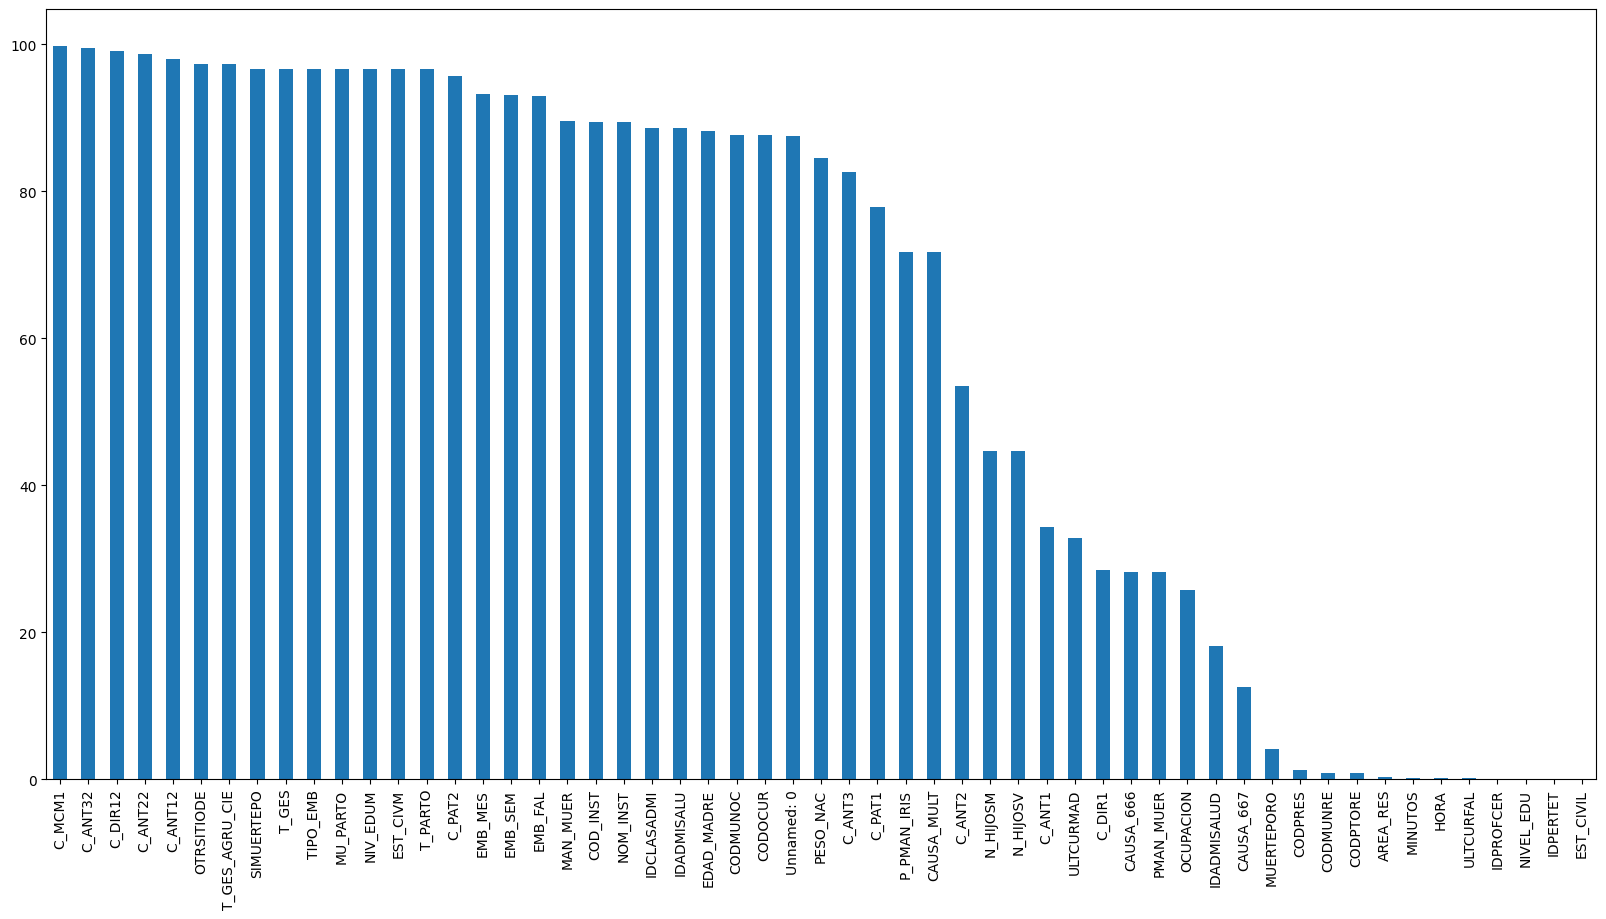

In [22]:
df_nan.plot(kind='bar', figsize=(20, 10))

In [35]:
temp = df_raw[['C_DIR1', 'C_ANT1', 'C_ANT2', 'C_ANT3']]
four_cols = temp[temp.isnull().sum(axis=1) == 4].shape[0]*100/df_raw.shape[0]
three_cols = temp[temp.isnull().sum(axis=1) == 3].shape[0]*100/df_raw.shape[0]
two_cols = temp[temp.isnull().sum(axis=1) == 2].shape[0]*100/df_raw.shape[0]
one_cols = temp[temp.isnull().sum(axis=1) == 1].shape[0]*100/df_raw.shape[0]
zero_cols = temp[temp.isnull().sum(axis=1) == 0].shape[0]*100/df_raw.shape[0]

print(f'Faltan datos en 4 de 4 columnas: {four_cols}%')
print(f'Faltan datos en 3 de 4 columnas: {three_cols}%')
print(f'Faltan datos en 2 de 4 columnas: {two_cols}%')
print(f'Faltan datos en 1 de 4 columnas: {one_cols}%')
print(f'Faltan datos en 0 de 4 columnas: {zero_cols}%')

Faltan datos en 4 de 4 columnas: 28.423143174592916%
Faltan datos en 3 de 4 columnas: 5.8435223321145475%
Faltan datos en 2 de 4 columnas: 19.278397665499252%
Faltan datos en 1 de 4 columnas: 29.08786193834154%
Faltan datos en 0 de 4 columnas: 17.367074889451747%


Esto quiere decir que podemos eliminar 28% de las muestras ya que no tienen causa registrada de muerte y si vamos más adelante C_ANT2 y C_ANT3 no nos da más información ya que si eliminamos estas variable seguiremos con un 28% de muestras con datos faltantes. Además estas variables tienen una falta de datos del 52% y el 85% respectivamente.

In [34]:
print(f'El numero de variables que tienen más de 50% de las variables es {len(df_nan[df_nan > 50])}.')

El numero de variables que tienen más de 80% de las variables es 32.


En general se tiene 33 variables con mas del 50% de valores en NaN y se procede a eliminar por la gran cantidad de valores faltantes.

In [41]:
df_raw = df_raw.drop(df_nan[df_nan > 50].index, axis=1)
df_nan = get_nan(df_raw)
df_nan

N_HIJOSM       44.692596
N_HIJOSV       44.682001
C_ANT1         34.310381
ULTCURMAD      32.824909
C_DIR1         28.423299
CAUSA_666      28.221093
PMAN_MUER      28.221093
OCUPACION      25.790895
IDADMISALUD    18.114472
CAUSA_667      12.515970
MUERTEPORO      4.106877
CODPRES         1.200589
CODMUNRE        0.893862
CODPTORE        0.803852
AREA_RES        0.311573
MINUTOS         0.238154
HORA            0.123971
ULTCURFAL       0.107068
IDPROFCER       0.000404
NIVEL_EDU       0.000217
IDPERTET        0.000186
EST_CIVIL       0.000031
dtype: float64

Hasta ahora se ve guardar el proceso que se lleva con la base de datos por lo que esta es muy pesada y re hacer todo el proceso puede demorar. Además se va proceder analizar las variables que quedan con una alta catidad de valores NaN.

In [18]:
#df_raw.to_csv('./../data_raw/nofetal2008_2021_2.csv', index=False)

<Axes: >

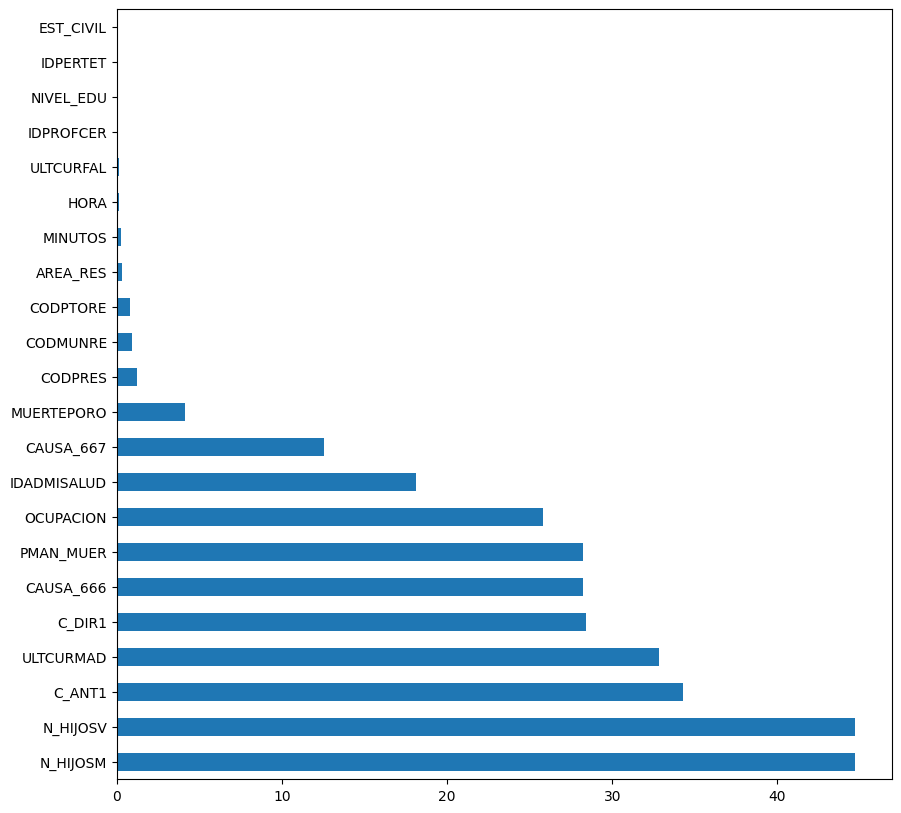

In [43]:
df_nan.plot(kind='barh', figsize=(10, 10))

In [3]:
df_raw = pd.read_csv('./../data_raw/nofetal2008_2021_2.csv')
df_raw

C:\Users\diego\AppData\Local\Temp\ipykernel_1848\449421912.py:1: DtypeWarning: Columns (0,2,3,4,6,7,8,9,10,11,12,13,15,17,18,19,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('./../data_raw/nofetal2008_2021_2.csv')


,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEE,ASIS_MED,C_DIR1,C_ANT1,C_ANT2,C_BAS1,CAUSA_666,CAUSA_667,IDPROFCER,CAU_HOMOL
0,68,1,1,1,2,2008,2,4,0.0,1,...,0.0,1,T794,K922,K290,W189,503.0,503.0,1.0,93
1,68,1,1,1,2,2008,2,8,15.0,1,...,0.0,1,I249,I10X,I420,I249,303.0,303.0,1.0,51
2,68,1,1,1,2,2008,2,7,50.0,1,...,0.0,9,R570,I119,NaN,I119,302.0,302.0,1.0,50
3,68,1,1,1,2,2008,2,1,45.0,1,...,0.0,1,R578,E878,NaN,N189,612.0,610.0,1.0,74
4,68,1,1,1,2,2008,2,2,0.0,1,...,0.0,1,A419,K659,K275,K275,611.0,609.0,1.0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218499,68,276,1,1,2,2021,8,2.0,55.0,1,...,0,1,NaN,NaN,NaN,K746,NaN,608.0,1,66
3218500,76,111,1,1,2,2021,8,2.0,55.0,1,...,0,1,NaN,NaN,NaN,U071,NaN,109.0,1,10
3218501,17,1,1,1,2,2021,8,2.0,40.0,1,...,0,1,NaN,NaN,NaN,D381,NaN,215.0,1,37
3218502,76,1,1,3,2,2021,8,0.0,10.0,1,...,0,1,NaN,NaN,NaN,I219,NaN,303.0,1,51


In [4]:
temp = df_raw[['C_DIR1', 'C_ANT1']]
temp[temp.isnull().sum(axis=1) == 2].shape[0]*100/df_raw.shape[0]

28.4231742449287

Primero para revisar la informacion del número de hijos nacidos vivos y muertos tenemos que ver si solo las mujeres tienen esta información.

In [55]:
df_mujeres = df_raw[df_raw['SEXO'] == '2']
n_HM = df_mujeres[['N_HIJOSV']].isna().sum(axis=1)
n_HM = df_mujeres[['N_HIJOSM']].isna().sum(axis=1)

print(f'Faltan datos en Mujeres y N_HIJOSV: {n_HM[n_HM == 1].shape[0]*100/df_raw.shape[0]}%')
print(f'Faltan datos en Mujeres y N_HIJOSM: {n_HM[n_HM == 1].shape[0]*100/df_raw.shape[0]}%')


Faltan datos en Mujeres y N_HIJOSV: 18.04857163452337%
Faltan datos en Mujeres y N_HIJOSM: 18.04857163452337%


In [56]:
df_mujeres = df_raw[df_raw['SEXO'] == '1']
n_HM = df_mujeres[['N_HIJOSV']].isna().sum(axis=1)
n_HM = df_mujeres[['N_HIJOSM']].isna().sum(axis=1)

print(f'Faltan datos en Hombres y N_HIJOSV: {n_HM[n_HM == 1].shape[0]*100/df_raw.shape[0]}%')
print(f'Faltan datos en Hombres y N_HIJOSM: {n_HM[n_HM == 1].shape[0]*100/df_raw.shape[0]}%')

Faltan datos en Hombres y N_HIJOSV: 22.97436945860561%
Faltan datos en Hombres y N_HIJOSM: 22.97436945860561%


In [57]:
df_mujeres = df_raw[df_raw['SEXO'] == '99']
n_HM = df_mujeres[['N_HIJOSV']].isna().sum(axis=1)
n_HM = df_mujeres[['N_HIJOSM']].isna().sum(axis=1)

print(f'Faltan datos en Hombres y N_HIJOSV: {n_HM[n_HM == 1].shape[0]*100/df_raw.shape[0]}%')
print(f'Faltan datos en Hombres y N_HIJOSM: {n_HM[n_HM == 1].shape[0]*100/df_raw.shape[0]}%')

Faltan datos en Hombres y N_HIJOSV: 0.0%
Faltan datos en Hombres y N_HIJOSM: 0.0%


In [19]:
element= df_raw['C_ANT1'].unique()

tabla = pd.DataFrame({'causas muerte': list(element)})
tabla.to_excel('./../data_raw/causas_muerte.xlsx', index=False)

In [12]:
tabla = pd.DataFrame({'variables': df_raw.columns.to_list()})
tabla.to_excel('./../data_raw/variables.xlsx', index=False)